In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

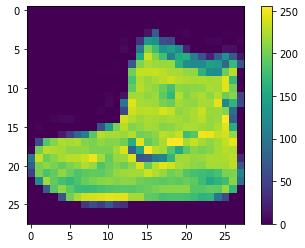

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
unique, counts=np.unique(train_labels,return_counts=True)
dict(zip(unique,counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [11]:
x_train = train_images / 255.0

x_test = test_images / 255.0

In [12]:
y_train=keras.utils.to_categorical(train_labels)
y_test=keras.utils.to_categorical(test_labels)

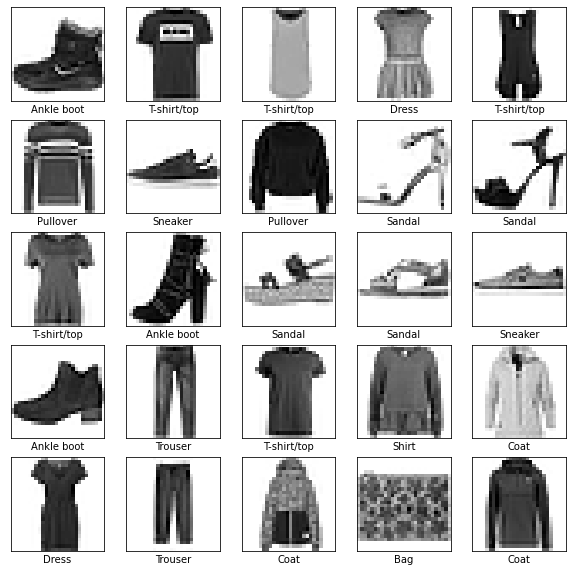

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
# one-hot endcoding을 안 한경우 sparse_categorical~
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4972 - accuracy: 0.8267
Epoch 2/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3750 - accuracy: 0.8656
Epoch 3/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3359 - accuracy: 0.8792
Epoch 4/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3138 - accuracy: 0.8847
Epoch 5/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2951 - accuracy: 0.8920


In [17]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 0.3471 - accuracy: 0.8735

테스트 정확도: 0.8735


In [18]:
# 예측 만들기
predictions = model.predict(x_test)
predictions[0]

array([2.0556965e-05, 1.9491369e-08, 8.3402722e-07, 2.0226024e-07,
       1.6625506e-06, 4.2674493e-02, 1.9812964e-05, 6.3540287e-02,
       1.1127227e-05, 8.9373094e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

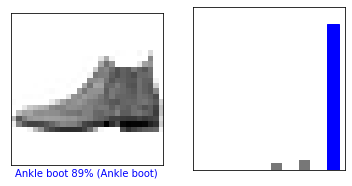

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

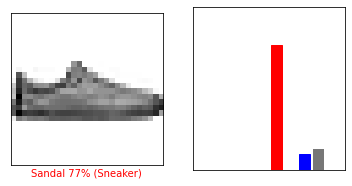

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

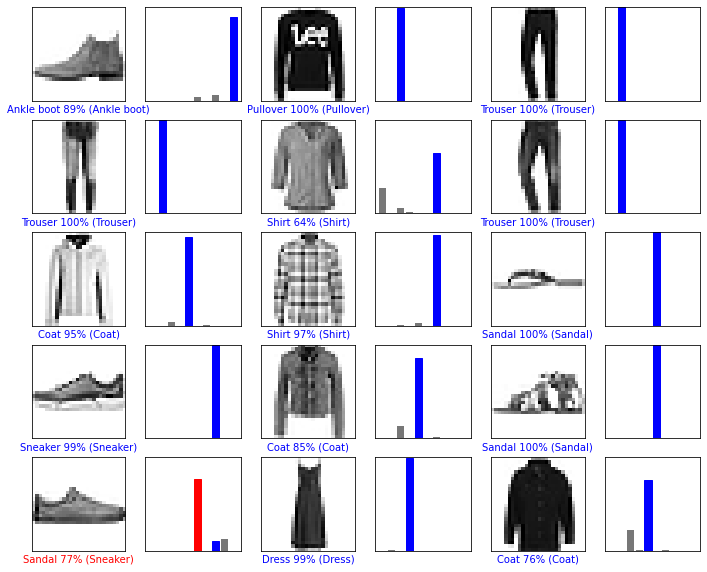

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [25]:
img = test_images[0]

print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


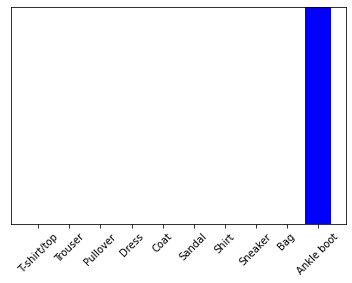

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)